In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [7]:
# Hyper-parameters 
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [9]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [02:54<00:00, 977kB/s]  


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


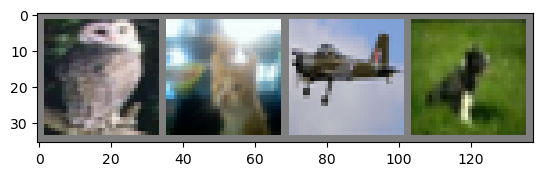

In [11]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        pass

    def forward(self, x):
        pass

model = ConvNet().to(device)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

ValueError: optimizer got an empty parameter list

In [13]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Epoch [1/4], Step [2000/12500], Loss: 2.2930
Epoch [1/4], Step [4000/12500], Loss: 2.3001
Epoch [1/4], Step [6000/12500], Loss: 2.2914
Epoch [1/4], Step [8000/12500], Loss: 2.2541
Epoch [1/4], Step [10000/12500], Loss: 2.2817
Epoch [1/4], Step [12000/12500], Loss: 2.0560
Epoch [2/4], Step [2000/12500], Loss: 2.0758
Epoch [2/4], Step [4000/12500], Loss: 1.5489
Epoch [2/4], Step [6000/12500], Loss: 2.1524
Epoch [2/4], Step [8000/12500], Loss: 1.7605
Epoch [2/4], Step [10000/12500], Loss: 1.5357
Epoch [2/4], Step [12000/12500], Loss: 2.3929
Epoch [3/4], Step [2000/12500], Loss: 1.5050
Epoch [3/4], Step [4000/12500], Loss: 1.3180
Epoch [3/4], Step [6000/12500], Loss: 1.6682
Epoch [3/4], Step [8000/12500], Loss: 1.2909
Epoch [3/4], Step [10000/12500], Loss: 1.8215
Epoch [3/4], Step [12000/12500], Loss: 1.8275
Epoch [4/4], Step [2000/12500], Loss: 1.4812
Epoch [4/4], Step [4000/12500], Loss: 2.1825
Epoch [4/4], Step [6000/12500], Loss: 1.5146
Epoch [4/4], Step [8000/12500], Loss: 1.3783
Epoc

In [14]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 45.88 %
Accuracy of plane: 57.2 %
Accuracy of car: 55.5 %
Accuracy of bird: 36.1 %
Accuracy of cat: 53.3 %
Accuracy of deer: 26.9 %
Accuracy of dog: 20.0 %
Accuracy of frog: 60.3 %
Accuracy of horse: 48.6 %
Accuracy of ship: 53.4 %
Accuracy of truck: 47.5 %
